## Tugas PD
Amelia Cantika Putri Tantjaro
3022110701

*Imbalanced Sampling*

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import imblearn as imb
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import confusion_matrix


In [28]:
# load data
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/PD2024/Shopping_Dataset.csv')
print(len(data))
data.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
30


,Day,Discount,Free Delivery,Purchase
0,Weekday,Yes,Yes,Yes
1,Weekday,Yes,Yes,Yes
2,Weekday,No,No,No
3,Holiday,Yes,Yes,Yes
4,Weekend,Yes,Yes,Yes


In [29]:
data.isna().sum()

Day              0
Discount         0
Free Delivery    0
Purchase         0
dtype: int64

In [30]:
shopping_dataset = data.dropna()
print(len(shopping_dataset))
shopping_dataset.isna().sum()

30


Day              0
Discount         0
Free Delivery    0
Purchase         0
dtype: int64

<Axes: xlabel='Purchase', ylabel='count'>

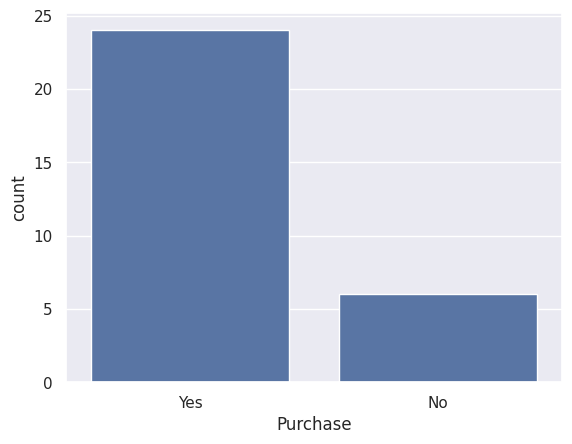

In [31]:
sns.set(style='darkgrid')
sns.countplot(x='Purchase',data=shopping_dataset)

In [32]:
X = shopping_dataset.loc[:, shopping_dataset.columns != 'Purchase']
y = shopping_dataset.loc[:, shopping_dataset.columns == 'Purchase']

*Oversampling*

In [33]:
# minor = (sampling_strategy) * majority
# minor must more equal than minority
oversample = imb.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [34]:
X_over, y_over = oversample.fit_resample(X, y)

In [36]:
len(X_over)

48

<Axes: xlabel='Purchase', ylabel='count'>

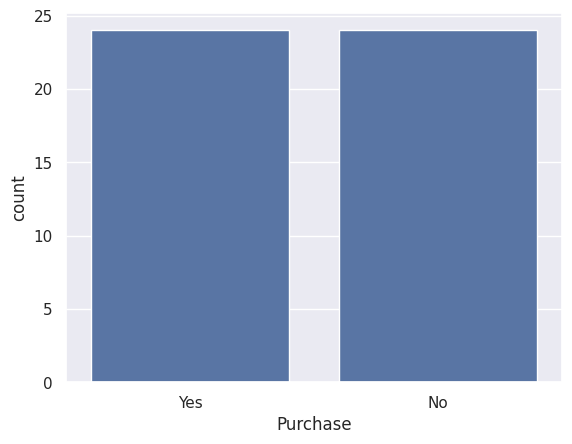

In [37]:
sns.set(style="darkgrid")
sns.countplot(x='Purchase',data=y_over)

*Undersampling*

In [38]:
# major = (1/sampling_strategy) * minority
# major must less equal than minority
undersample = imb.under_sampling.RandomUnderSampler(sampling_strategy='majority')

In [39]:
X_under, y_under = undersample.fit_resample(X, y)

In [40]:
len(X_under)

12

<Axes: xlabel='Purchase', ylabel='count'>

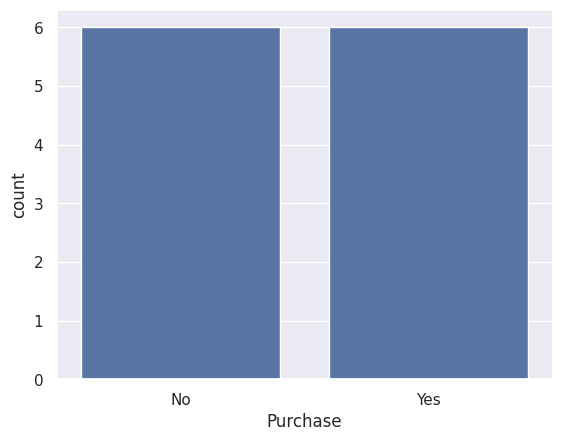

In [41]:
sns.set(style="darkgrid")
sns.countplot(x='Purchase',data=y_under)

*Over to Under*

<Axes: xlabel='Purchase', ylabel='count'>

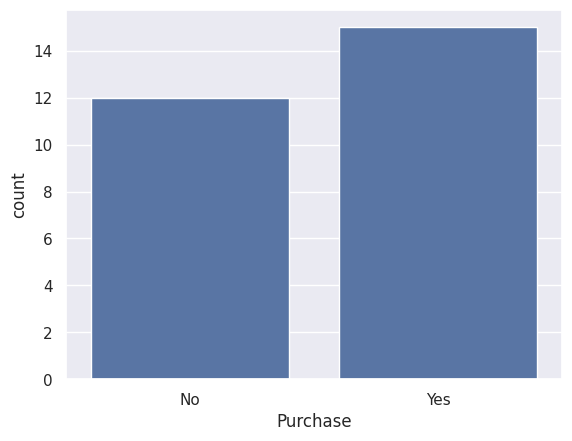

In [42]:
# over
over = imb.over_sampling.RandomOverSampler(sampling_strategy=0.5)
X_co, y_co = over.fit_resample(X, y)

# under
under = imb.under_sampling.RandomUnderSampler(sampling_strategy=0.8)
X_c, y_c = under.fit_resample(X_co, y_co)

# Visualisation
sns.set(style='darkgrid')
sns.countplot(x='Purchase',data=y_c)

*Under to Over*

<Axes: xlabel='Purchase', ylabel='count'>

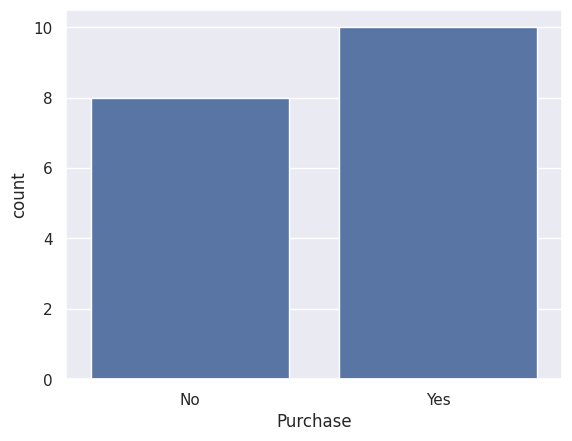

In [43]:
# Under
under = imb.under_sampling.RandomUnderSampler(sampling_strategy=0.6)
X_co, y_co = under.fit_resample(X, y)

#Over
over = imb.over_sampling.RandomOverSampler(sampling_strategy=0.8)
X_c, y_c = over.fit_resample(X_co, y_co)

# Visualisation
sns.set(style='darkgrid')
sns.countplot(x='Purchase',data=y_c)

*Naive Bayes*

In [44]:
# load dataset
data = fetch_20newsgroups()


HTTPError: HTTP Error 403: Forbidden

In [26]:
data.DESCR

AttributeError: 'DataFrame' object has no attribute 'DESCR'

In [22]:
data.target_names

AttributeError: 'DataFrame' object has no attribute 'target_names'

In [ ]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [ ]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
print(len(test.target_names))
print(test.data[5])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [23]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

NameError: name 'test' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(test.target, labels)
print(acc_score)

In [ ]:
# membuat fungsi prediksi data baru
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return pred[0]

In [ ]:
predict_category('Elon Musk launches Starlink in Indonesia')

In [ ]:
predict_category("Toyota said its next generation of clean, compact engines is completely different from anything today")